In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# with open("train_data.txt") as f:
#     content = f.readlines()

# content

In [3]:
with open("train_data.txt", encoding="utf8") as f:
    train_content = f.readlines()

with open("test_data_solution.txt", encoding="utf8") as f:
    content_test = f.readlines()

train = pd.DataFrame([element.split(":::") for element in train_content], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

test = pd.DataFrame([element.split(":::") for element in content_test], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

In [4]:
# train.to_csv("train_data.csv", index=False)
# test.to_csv("test_data.csv", index=False)

In [5]:
train  = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [6]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION
13104,Craque la vie! (1994),drama,"Entre ses quatre enfants, son mari, son temps..."
23366,Il mistero di Lovecraft - Road to L. (2005),thriller,1997: A student of folklore named Andrea Robe...
18673,Wipe Out (2013),short,A dark comedy about nuclear (and other strang...
22597,Midnight Son (2011),horror,The story of a young man called Jacob who is ...
40269,La brújula la lleva el muerto (2011),comedy,A Mexican boy bound for Chicago tries to cros...


In [7]:
test.sample(5)

,TITLE,GENRE,DESCRIPTION
17941,Myself Ghaint (2014),drama,"The story is about three friends, Ghaint, Abs..."
45234,Necroland (2016),action,"In the near future, Earth has changed even mo..."
53083,Waterlife (2009),documentary,Water's journey from streams entering Lake Su...
601,I am (????),drama,"Living a lie, a broken soul; Kevin, a priest ..."
36649,Lay chong nguoi ta (2012),thriller,In this dark love triangle that proceeds with...


In [8]:
len(train), len(test)

(54214, 54200)

In [9]:
train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
train["GENRE"].value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

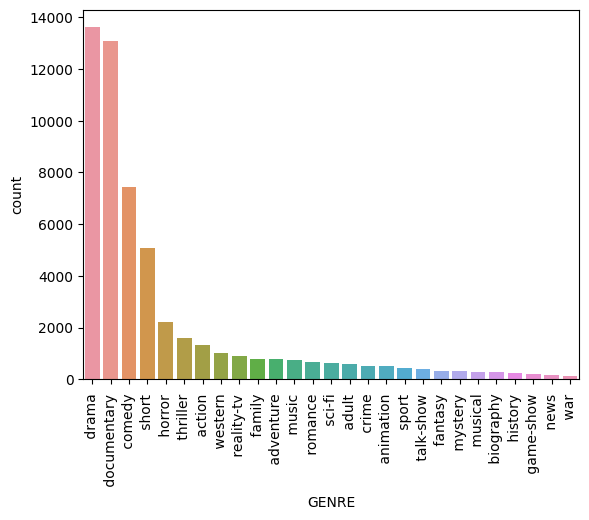

In [12]:
sns.barplot(x=train["GENRE"].value_counts().index,y=train["GENRE"].value_counts())
plt.xticks(rotation=90)
plt.show()

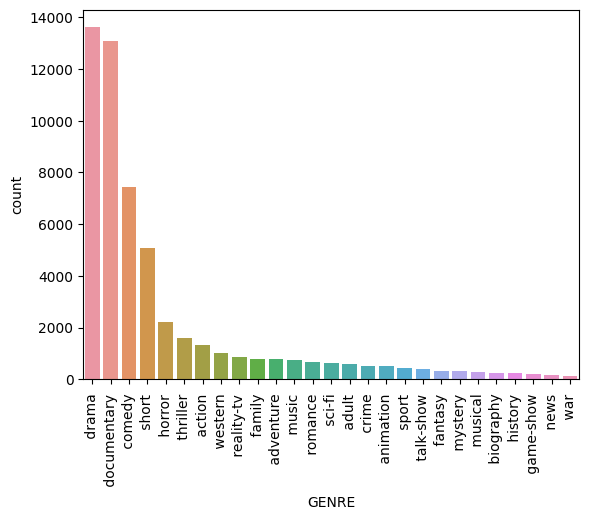

In [13]:
sns.barplot(x=test["GENRE"].value_counts().index,y=test["GENRE"].value_counts())
plt.xticks(rotation=90)
plt.show()

highly class imbalance in training and testing data

# Text Prepocessing

In [14]:
import re
from nltk.stem import PorterStemmer

stammer = PorterStemmer()


def clean_title(text):

    # applied slicing but all the rows are not in the same format
    # text = text[:-7]

    # for removing the text in the brackets
    text = re.sub(r'\([^)]*\)', '', text)
    text = text.strip()
    # removing all the special characters and converting the text to upper case
    # only alphabets and numbers and single quote are allowed
    text = re.sub(r'[^\'a-zA-Z0-9\s]', '', text)
    text = text.upper()

    return text


def clean_desc(text):

    # removed all the special characters and converted the text to lower case
    text = re.sub(r'[^\'a-zA-Z0-9\s]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.strip()

    # stemming the words: eg - running, ran, run -> run
#     text = ' '.join([stammer.stem(word) for word in text.split()])
    if len(text) > 600:
        text = text[:600]

    return text

In [15]:
stammer.stem(word="loving")

'love'

In [16]:
clean_title(train["TITLE"][1000]),clean_desc(train["DESCRIPTION"][1000]),

('MISSIONARIES MANSION',
 'when the latest group of young adults come to nashville tn after a year in costa rica they are thrilled at the big city life just miles away from their old plantation home while living in the old home some mid dream encounters occur after a few nights of this the girls talk over breakfast and realize that it may not be dreams at all as the same young girl and dark figure appear at both bedsides as they begin to ask questions to small town locals they learn the dark history of the home and the effects it had on the previous mission workers that passed though the same cycle lily is not as tormen')

In [17]:
train["TITLE"]= train["TITLE"].apply(clean_title)
test["TITLE"]= test["TITLE"].apply(clean_title)

train["DESCRIPTION"]=train["DESCRIPTION"].apply(clean_desc)
test["DESCRIPTION"]=test["DESCRIPTION"].apply(clean_desc)

In [18]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION
50556,OCEAN IN A DROP,documentary,ocean in a drop describes the impact the inter...
45114,THE INN AT THE EDGE OF THE WORLD,drama,based upon the award winning book by alice tho...
13709,CRU,drama,when four high school best friends' lives are ...
14957,KING SUN,crime,jeremiah king sun sunday son of the late carte...
44601,IL COLORE DEL SILENZIO,drama,the theatre company managed by marco is passin...


# Merging title and Description

In [19]:
train["input"] = train["TITLE"]+" "+train["DESCRIPTION"]
test["input"] = test["TITLE"]+" "+test["DESCRIPTION"]

In [20]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION,input
34863,WILD SEX,documentary,wild sex tells the amazing stories and bizarre...,WILD SEX wild sex tells the amazing stories an...
891,SANITY,drama,sanity follows five graduate mft student thera...,SANITY sanity follows five graduate mft studen...
3647,EMMA,thriller,emma morris at her young age faces a traumatic...,EMMA emma morris at her young age faces a trau...
14992,CAMPAIGN,drama,a six part drama series set in an advertising ...,CAMPAIGN a six part drama series set in an adv...
19787,GOALTENDING WINS CHAMPIONSHIPS TECHNICAL FUNDA...,short,goaltending wins championships technical funda...,GOALTENDING WINS CHAMPIONSHIPS TECHNICAL FUNDA...


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
 3   input        54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(stop_words="english")
cv.fit_transform(train["DESCRIPTION"])

<54214x109516 sparse matrix of type '<class 'numpy.int64'>'
	with 1997272 stored elements in Compressed Sparse Row format>

In [24]:
sorted([(key,value) for key,value in cv.vocabulary_.items()],key=lambda x:x[1],reverse=True)[:5]

[('zz', 109515),
 ('zyzyphus', 109514),
 ('zypcio', 109513),
 ('zylkin', 109512),
 ('zyler', 109511)]

In [25]:
mydict = {}
for element in train["GENRE"].unique():
    mydict[element.strip()] = train[train["GENRE"]==element].copy()

In [26]:
# for element in train["GENRE"].unique():
#     cv.fit_transform(mydict[element.strip()]["DESCRIPTION"])
    
#     top = sorted([(key,value) for key,value in cv.vocabulary_.items()],key=lambda x:x[1],reverse=True)[:5]

#     keys = [element[0] for element in top]
#     value = [element[1] for element in top]
    
#     sns.barplot(x=keys,y=value)
#     plt.xticks(rotation=90)
#     plt.title(f"top words frequency for {element.strip()} GENRE")
#     plt.savefig(f"freqs/{element.strip()}.png")
#     plt.show()

# it contains description in different languages so we can convert it to english for better results

In [27]:
# from deep_translator import GoogleTranslator
# translator = GoogleTranslator(target='en')

In [28]:
# count = 0
# def translate_to_en(text):
#     global count
#     count=count+1
#     print(count)
#     return translator.translate(text)

In [29]:
# train["translated"] = train["input"].apply(translate_to_en)

In [30]:
# train.to_csv("train_data_translated.csv", index=False)

In [31]:
cv2 = CountVectorizer(max_features=10000,stop_words="english")
X_train_trainsformed = cv2.fit_transform(train["input"])


In [32]:
X_test_transformed = cv2.transform(test["input"])

In [33]:
X_train_trainsformed.shape,X_test_transformed.shape

((54214, 10000), (54200, 10000))

In [34]:
# ! pip install wordcloud

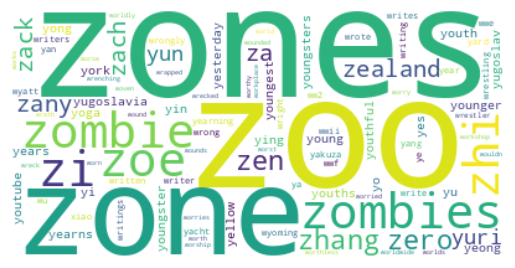

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(max_words=100, background_color="white").generate_from_frequencies(cv2.vocabulary_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression()
svc = SVC()
rdmfr = RandomForestClassifier()
dcst = DecisionTreeClassifier()

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(train["GENRE"])
y_test = encoder.transform(test["GENRE"])

In [38]:
len(y_train),len(y_test)

(54214, 54200)

In [39]:
# lgc.fit(X_train_trainsformed,y_train)
# lgc.score(X_test_transformed,y_test)

In [40]:
bnb.fit(X_train_trainsformed,y_train)
bnb.score(X_test_transformed,y_test)

0.5662546125461254

In [41]:
mnb.fit(X_train_trainsformed,y_train)
mnb.score(X_test_transformed,y_test)

0.549520295202952

In [42]:
# gnb.fit(X_train_trainsformed.toarray(),y_train)
# gnb.score(X_test_transformed.toarray(),y_test)

#27% acc

In [43]:
# dcst.fit(X_train_trainsformed,y_train)
# dcst.score(X_test_transformed,y_test)

In [44]:
# rdmfr.fit(X_train_trainsformed,y_train)
# rdmfr.score(X_test_transformed,y_test)

In [45]:
# svc.fit(X_train_trainsformed,y_train)
# svc.score(X_test_transformed,y_test)

In [64]:
bnb = BernoulliNB()
bnb.fit(X_train_trainsformed,y_train)
bnb.score(X_test_transformed,y_test)

0.5662546125461254

In [67]:
bnb.class_count_

array([ 1315.,   590.,   775.,   498.,   265.,  7447.,   505., 13096.,
       13613.,   784.,   323.,   194.,   243.,  2204.,   731.,   277.,
         319.,   181.,   884.,   672.,   647.,  5073.,   432.,   391.,
        1591.,   132.,  1032.])

In [69]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train_trainsformed,y_train)
lsvc.score(X_test_transformed,y_test)

C:\Users\Pankil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Pankil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4925092250922509